In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: inline plots
%matplotlib inline

# Load
df = pd.read_csv("../data/benin-malanville.csv", parse_dates=["Timestamp"])  # adjust column if different
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
# Numeric summary
df.describe(include=[np.number])

# Missing values
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (df.isna().mean()*100).sort_values(ascending=False)
display(na_counts, na_pct)

# Columns with >5% nulls
high_nulls = na_pct[na_pct > 5]
high_nulls


Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

Comments         100.0
GHI                0.0
Timestamp          0.0
DNI                0.0
DHI                0.0
ModB               0.0
ModA               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
Tamb               0.0
WSstdev            0.0
WD                 0.0
BP                 0.0
WDstdev            0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
dtype: float64

Comments    100.0
dtype: float64

In [5]:
cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust","Tamb","RH","WD","TModA","TModB"]
existing = [c for c in cols if c in df.columns]  # keep only present columns

# Median imputation for core columns (simple, robust)
for c in ["GHI","DNI","DHI","ModA","ModB","WS","WSgust","Tamb","RH","TModA","TModB"]:
    if c in df.columns:
        df[c] = df[c].fillna(df[c].median())

# Z-score outliers: flag |Z| > 3
z_cols = [c for c in ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"] if c in df.columns]
z = df[z_cols].apply(lambda col: (col - col.mean())/col.std(ddof=0))
outlier_mask = (z.abs() > 3)

# Option A: drop rows with extreme outliers in any key column
df_clean = df[(~outlier_mask).all(axis=1)].copy()

# Option B (alternative): cap extremes (winsorize)
# for c in z_cols:
#     upper = df[c].quantile(0.99)
#     lower = df[c].quantile(0.01)
#     df_clean[c] = df[c].clip(lower, upper)


In [6]:
cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust","Tamb","RH","WD","TModA","TModB"]
existing = [c for c in cols if c in df.columns]  # keep only present columns

# Median imputation for core columns (simple, robust)
for c in ["GHI","DNI","DHI","ModA","ModB","WS","WSgust","Tamb","RH","TModA","TModB"]:
    if c in df.columns:
        df[c] = df[c].fillna(df[c].median())

# Z-score outliers: flag |Z| > 3
z_cols = [c for c in ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"] if c in df.columns]
z = df[z_cols].apply(lambda col: (col - col.mean())/col.std(ddof=0))
outlier_mask = (z.abs() > 3)

# Option A: drop rows with extreme outliers in any key column
df_clean = df[(~outlier_mask).all(axis=1)].copy()

# Option B (alternative): cap extremes (winsorize)
# for c in z_cols:
#     upper = df[c].quantile(0.99)
#     lower = df[c].quantile(0.01)
#     df_clean[c] = df[c].clip(lower, upper)


In [8]:
df_clean.to_csv("../data/benin-malanville_clean.csv", index=False)  # data/ is ignored by Git


C:\Users\Hp\AppData\Local\Temp\ipykernel_13616\3432424326.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  ax.legend(); plt.tight_layout()
c:\Users\Hp\Desktop\solar-challenge-week1\solar-challenge-week1\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\Hp\Desktop\solar-challenge-week1\solar-challenge-week1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


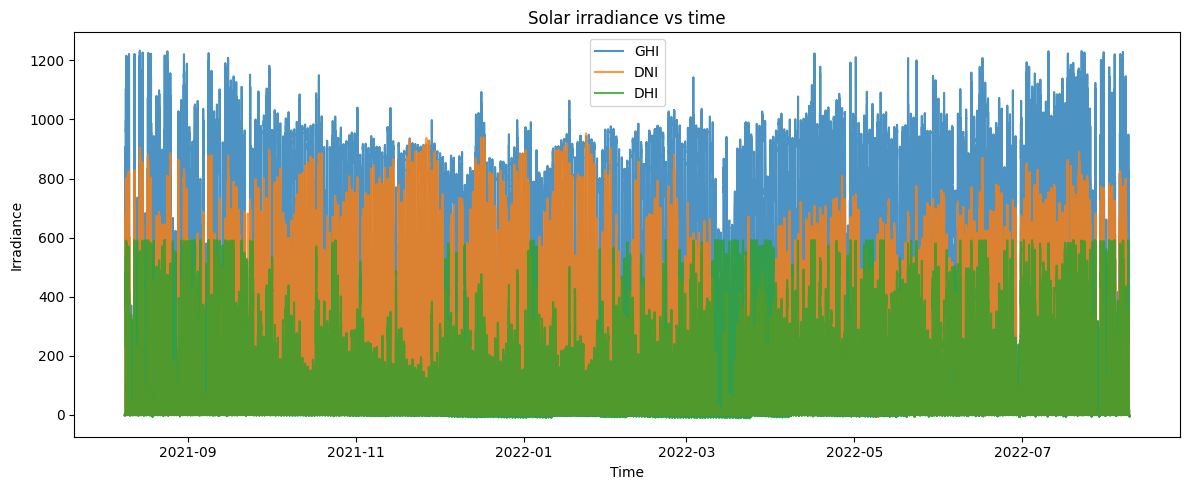

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
for c in ["GHI","DNI","DHI"]:
    if c in df_clean.columns:
        ax.plot(df_clean["Timestamp"], df_clean[c], label=c, alpha=0.8)
ax.set_title("Solar irradiance vs time")
ax.set_xlabel("Time"); ax.set_ylabel("Irradiance")
ax.legend(); plt.tight_layout()


C:\Users\Hp\AppData\Local\Temp\ipykernel_13616\717334991.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_clean.set_index("Timestamp").resample("M").mean()


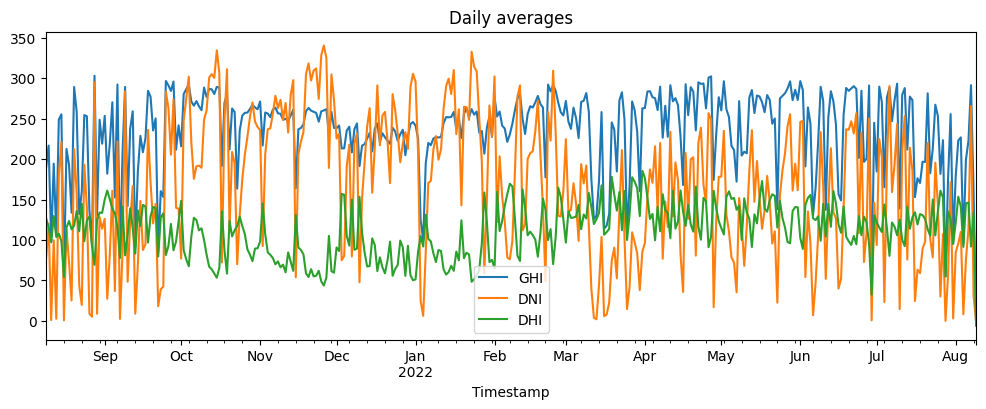

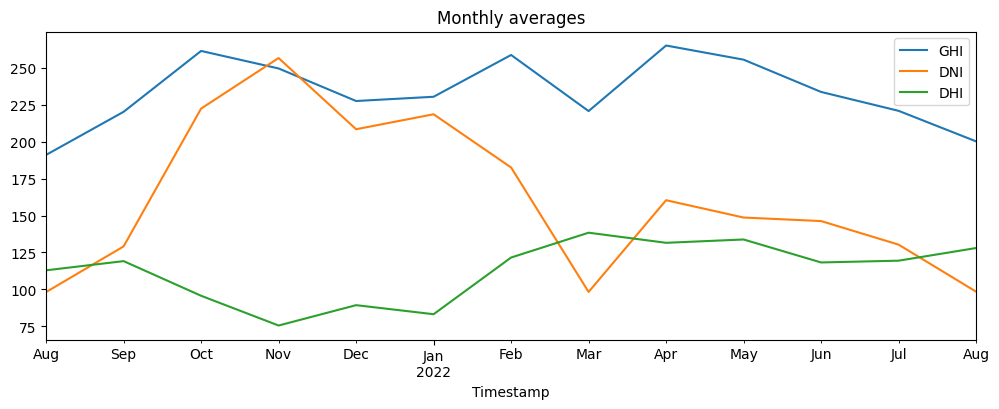

In [10]:
daily = df_clean.set_index("Timestamp").resample("D").mean()
monthly = df_clean.set_index("Timestamp").resample("M").mean()
daily[["GHI","DNI","DHI"]].plot(figsize=(12,4), title="Daily averages");
monthly[["GHI","DNI","DHI"]].plot(figsize=(12,4), title="Monthly averages");


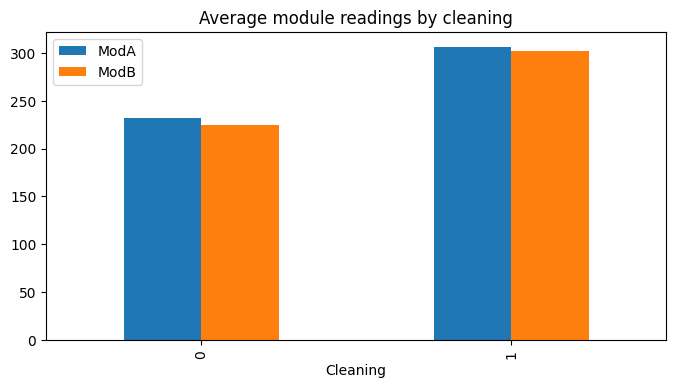

In [11]:
if "Cleaning" in df_clean.columns:
    cols_mod = [c for c in ["ModA","ModB"] if c in df_clean.columns]
    df_clean.groupby("Cleaning")[cols_mod].mean().plot(kind="bar", figsize=(8,4), title="Average module readings by cleaning");


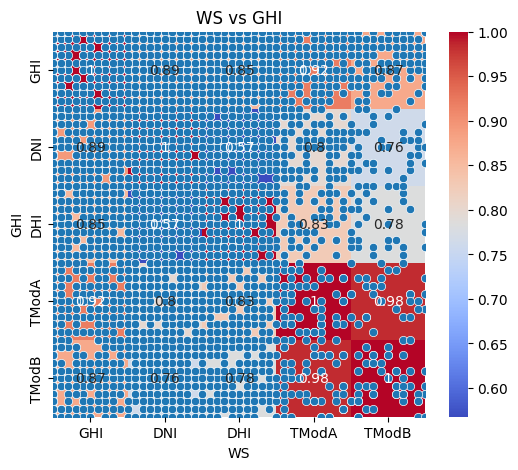

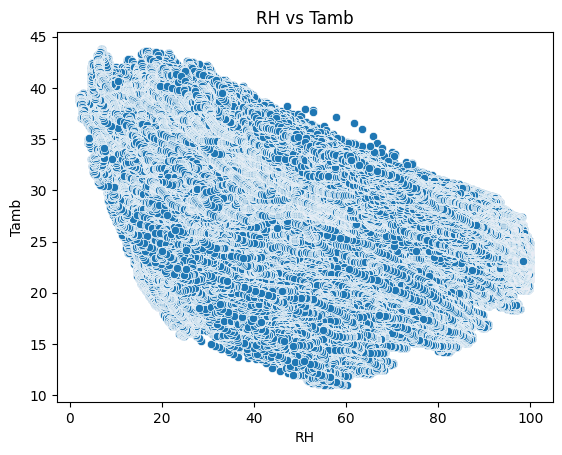

<Figure size 640x480 with 0 Axes>

In [12]:
corr_cols = [c for c in ["GHI","DNI","DHI","TModA","TModB"] if c in df_clean.columns]
if len(corr_cols) >= 2:
    plt.figure(figsize=(6,5))
    sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation heatmap")

# Scatter examples
if "WS" in df_clean.columns and "GHI" in df_clean.columns:
    sns.scatterplot(data=df_clean, x="WS", y="GHI"); plt.title("WS vs GHI"); plt.figure()

if "RH" in df_clean.columns and "Tamb" in df_clean.columns:
    sns.scatterplot(data=df_clean, x="RH", y="Tamb"); plt.title("RH vs Tamb"); plt.figure()


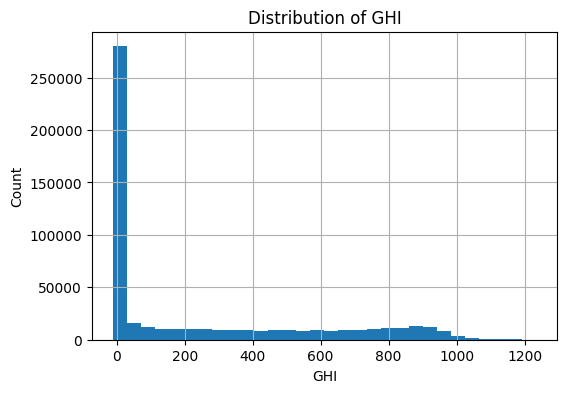

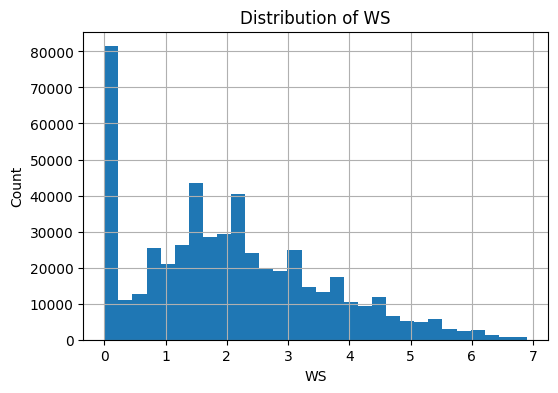

<Figure size 640x480 with 0 Axes>

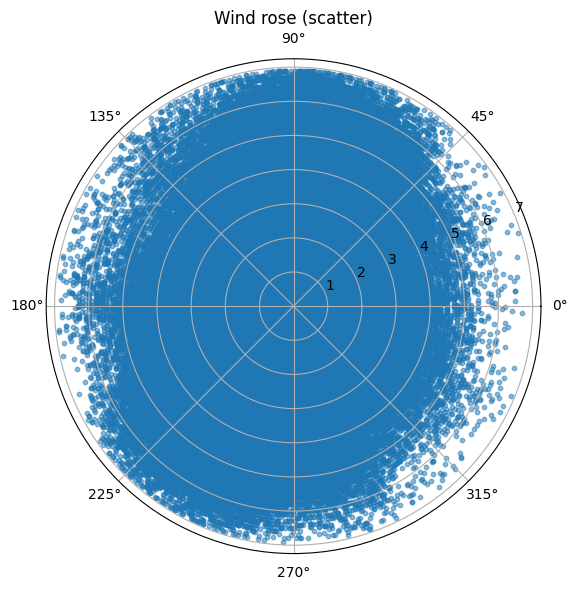

In [13]:
# Histograms
for c in [c for c in ["GHI","WS"] if c in df_clean.columns]:
    df_clean[c].hist(bins=30, figsize=(6,4))
    plt.title(f"Distribution of {c}"); plt.xlabel(c); plt.ylabel("Count"); plt.figure()

# Wind rose (simple polar, if WD and WS exist)
if set(["WD","WS"]).issubset(df_clean.columns):
    angles = np.deg2rad(df_clean["WD"])
    radii = df_clean["WS"]
    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, projection="polar")
    ax.scatter(angles, radii, s=10, alpha=0.5)
    ax.set_title("Wind rose (scatter)")
    plt.tight_layout()


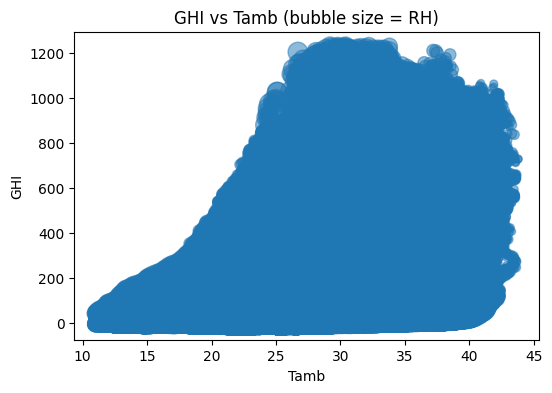

In [14]:
if set(["GHI","Tamb","RH"]).issubset(df_clean.columns):
    plt.figure(figsize=(6,4))
    sizes = (df_clean["RH"] - df_clean["RH"].min()) / (df_clean["RH"].max() - df_clean["RH"].min() + 1e-9) * 200 + 20
    plt.scatter(df_clean["Tamb"], df_clean["GHI"], s=sizes, alpha=0.5)
    plt.xlabel("Tamb"); plt.ylabel("GHI"); plt.title("GHI vs Tamb (bubble size = RH)")
